## Notebook showing a general workflow for the postprocessing analysis for the satay pipeline 

In [1]:

import os, sys
import warnings
import timeit
import numpy as np
import pysam
import pandas as pd 




In [4]:
dirname = os.path.dirname(os.path.abspath('__file__'))
# importing needed functions 
sys.path.insert(1,os.path.join(dirname,'..'))


from satay.python_scripts.python_modules.chromosome_names_in_files import chromosome_name_bedfile, chromosome_name_wigfile
from satay.python_scripts.python_modules.chromosome_and_gene_positions import chromosome_position, chromosomename_roman_to_arabic, gene_position
from satay.python_scripts.python_modules.essential_genes_names import list_known_essentials
from satay.python_scripts.python_modules.gene_names import list_gene_names, gene_aliases
from satay.python_scripts.python_modules.read_sgdfeatures import sgd_features
from satay.python_scripts.python_modules.dataframe_from_pergene import dataframe_from_pergenefile



from satay.python_scripts.clean_bedwigfiles import cleanfiles
from satay.python_scripts.transposonread_profileplot_genome import profile_genome
from satay.python_scripts.transposonread_profileplot import profile_plot
from satay.python_scripts.scatterplot_genes import scatterplot
from satay.python_scripts.genomicfeatures_dataframe import dna_features
from satay.python_scripts.volcanoplot import volcano

# importing the transposon mapping function

from satay.transposonmapping.transposonmapping_satay  import transposonmapper

In [5]:


bamfile= '../satay/data_files/files4test/SRR062634.filt_trimmed.sorted.bam'
filename='SRR062634.filt_trimmed.sorted.bam'
assert os.path.isfile(bamfile), "Not a file or directoy"


transposonmapper(bamfile=bamfile) ## if it is run  in spyder it wont complain ....
## the output are wig, bed , and txt files with the the number of reads per transposon per gene 

Getting coordinates of all genes ...
Getting reads for chromosome ref|NC_001133| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7fa16678ee50> completed in 0.003 seconds

Getting reads for chromosome ref|NC_001134| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7fa16678ed50> completed in 0.003 seconds

Getting reads for chromosome ref|NC_001135| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7fa166576f50> completed in 0.002 seconds

Getting reads for chromosome ref|NC_001136| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7fa166576d50> completed in 0.007 seconds

Getting reads for chromosome ref|NC_001137| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7fa166576ed0> completed in 0.001 seconds

Getting reads for chromosome ref|NC_001138| ...
Chromosome <pysam.libcalignmentfile.IteratorRowRegion object at 0x7fa166362bd0> completed in 0.004 seconds

Getting reads for chromosom

In [17]:
wig_files=[]
bed_files=[]
pergene_files=[]
data_dir= "../satay/data_files/data_unmerged/"
data_dir="../satay/data_files/files4test/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("sorted.bam.wig"):
            wig_files.append(os.path.join(root, file))
        elif file.endswith("sorted.bam.bed"):
             bed_files.append(os.path.join(root, file))
        elif file.endswith('sorted.bam_pergene_insertions.txt'):
            pergene_files.append(os.path.join(root, file))






### Clean the wig and bed files generated by transposon mapper (it is ok if run in spyder)

In [18]:
## clean wig files for proper visualization in the genome Browser http://genome-euro.ucsc.edu/cgi-bin/hgGateway

# calling the function

# filepath_wig = r"../data_files/data_unmerged/align_out_dnrp1_1_a/dnrp1-1_merged-DpnII-NlaIII-a_trimmed.sorted.bam.wig"
# filepath_bed = r"../data_files/data_unmerged/align_out_dnrp1_1_a/dnrp1-1_merged-DpnII-NlaIII-a_trimmed.sorted.bam.bed"
custom_header = ""
split_chromosomes = False
for files in zip(wig_files,bed_files):
    cleanfiles(filepath=files[0], custom_header=custom_header, split_chromosomes=split_chromosomes)
    cleanfiles(filepath=files[1], custom_header=custom_header, split_chromosomes=split_chromosomes)


Wig file loaded ../satay/data_files/files4test/SRR062634.filt_trimmed.sorted.bam.wig
evaluating chromosome I
evaluating chromosome II
evaluating chromosome III
evaluating chromosome IV
evaluating chromosome V
evaluating chromosome VI
evaluating chromosome VII
evaluating chromosome VIII
evaluating chromosome IX
evaluating chromosome X
evaluating chromosome XI
evaluating chromosome XII
evaluating chromosome XIII
evaluating chromosome XIV
evaluating chromosome XV
evaluating chromosome XVI
Bed file loaded ../satay/data_files/files4test/SRR062634.filt_trimmed.sorted.bam.bed
evaluating chromosome I
evaluating chromosome II
evaluating chromosome III
evaluating chromosome IV
evaluating chromosome V
evaluating chromosome VI
evaluating chromosome VII
evaluating chromosome VIII
evaluating chromosome IX
evaluating chromosome X
evaluating chromosome XI
evaluating chromosome XII
evaluating chromosome XIII
evaluating chromosome XIV
evaluating chromosome XV
evaluating chromosome XVI


Genome length:  12071326
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_1.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_2.txt


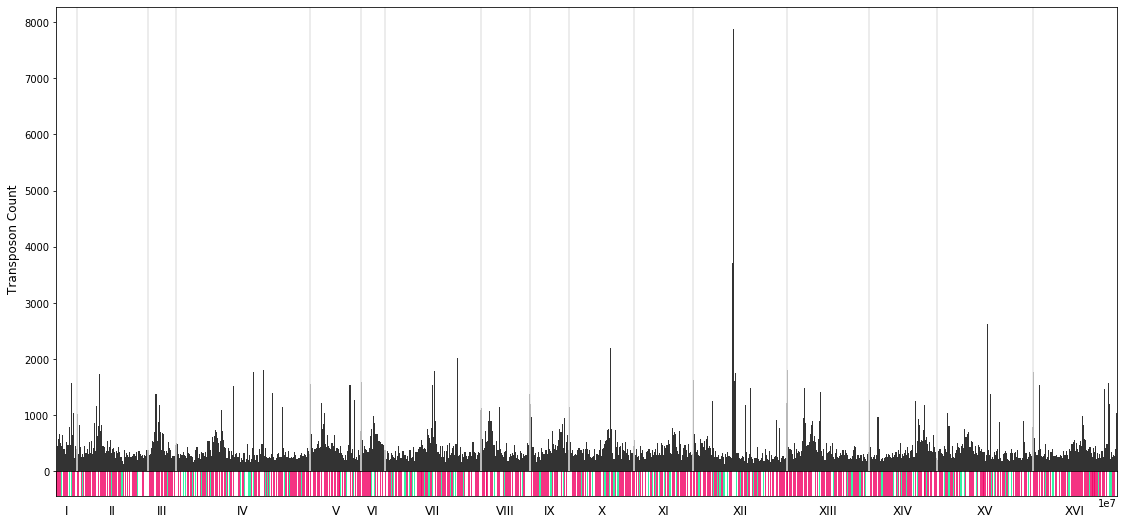

In [ ]:
#transposonread_profileplot_genome.py (to check the insertion and read distribution throughout the genome)


bed_file=r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_clean.bed"
variable="transposons" #"reads" "transposons"
bar_width=None
savefig=False

profile_genome(bed_file=bed_file, variable=variable, bar_width=bar_width, savefig=savefig)


Chromosome length:  230218
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_1.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_2.txt
Plotting chromosome  I ...
bar width for plotting is  287


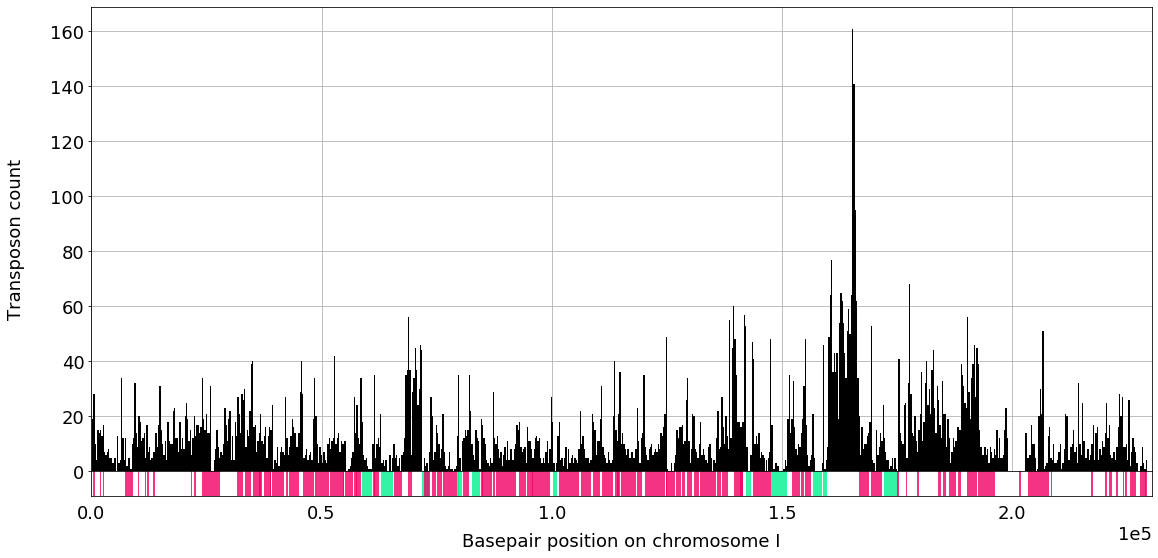

In [ ]:
# transposonread_profileplot.py (to check the insertions and read distribution per chromosome in more detail).


bed_file=r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_clean.bed"
variable="transposons" #"reads" "transposons"
chrom="I"
bar_width=None
savefig=False

profile_plot(bed_file=bed_file, variable=variable, chrom=chrom, bar_width=bar_width, savefig=savefig)

Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_1.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_2.txt


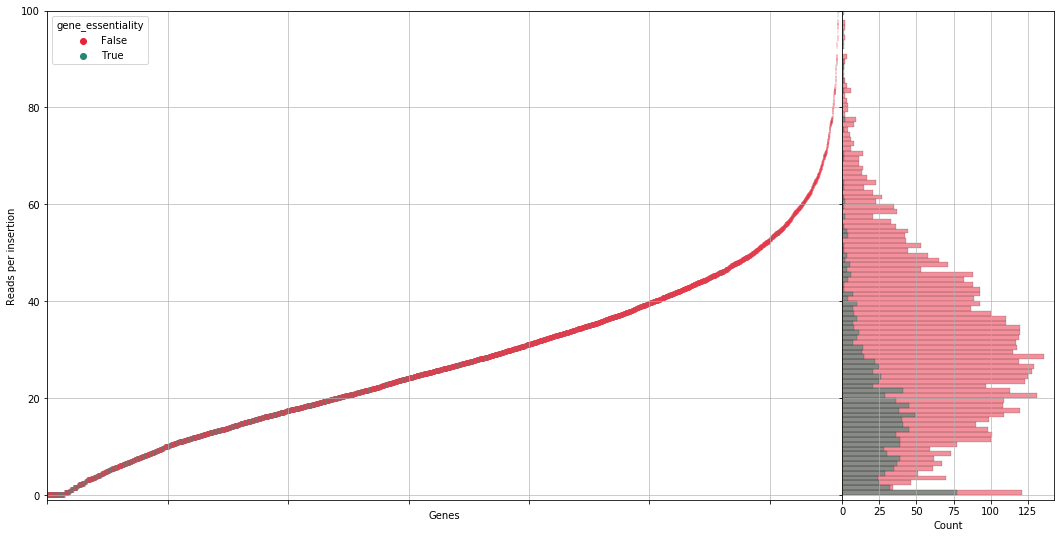

In [ ]:
#scatterplot_genes.py (to check the distribution for the number of insertions per gene and per essential gene).


pergenefile=r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt"

read_gene_df = scatterplot(pergenefile)

In [ ]:
cleanwig_files=[]
for root, dirs, files in os.walk("../satay/data_files/data_unmerged/"):
    for file in files:
        if file.endswith("clean.wig"):
            cleanwig_files.append(os.path.join(root, file))

In [ ]:
# genomic features 
i=1
wig_file = cleanwig_files[i]
pergene_insertions_file = pergene_files[i]
plotting=False
variable="reads" #"reads" or "insertions"
savefigure=False
verbose=True

dna_df2=[]
for chrom in ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI']:
#     region=chrom
   
    region = chrom #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
    dna_df2.append(dna_features(region=region,
                 wig_file=wig_file,
                 pergene_insertions_file=pergene_insertions_file,
                 variable=variable,
                 plotting=plotting,
                 savefigure=savefigure,
                 verbose=verbose))
data_genome=pd.concat(dna_df2, axis=0,ignore_index=True)

IndexError: list index out of range

In [ ]:
pergene_files[i],cleanwig_files[i]

('../satay/data_files/data_unmerged/align_out_dnrp1_2_a/dnrp1-2_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene_insertions.txt',
 '../satay/data_files/data_unmerged/align_out_dnrp1_2_a/dnrp1-2_merged-DpnII-NlaIII-a_trimmed.sorted.bam_clean.wig')

In [ ]:

data_genome.to_excel('dnrp1_1_2_a_unmerged.xlsx')

In [ ]:
plotting=False
variable="reads" #"reads" or "insertions"
savefigure=False
verbose=True

dna_df2=[]
data_genome=[]
for files in zip(cleanwig_files,pergene_files):
    
    for chrom in ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI']:
#     region=chrom
   
        region = chrom #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
        dna_df2.append(dna_features(region=region,
                    wig_file=files[0],
                    pergene_insertions_file=files[1],
                    variable=variable,
                    plotting=plotting,
                    savefigure=savefigure,
                    verbose=verbose))
    data_genome.append(pd.concat(dna_df2, axis=0,ignore_index=True))

Plotting: tn_per_gene


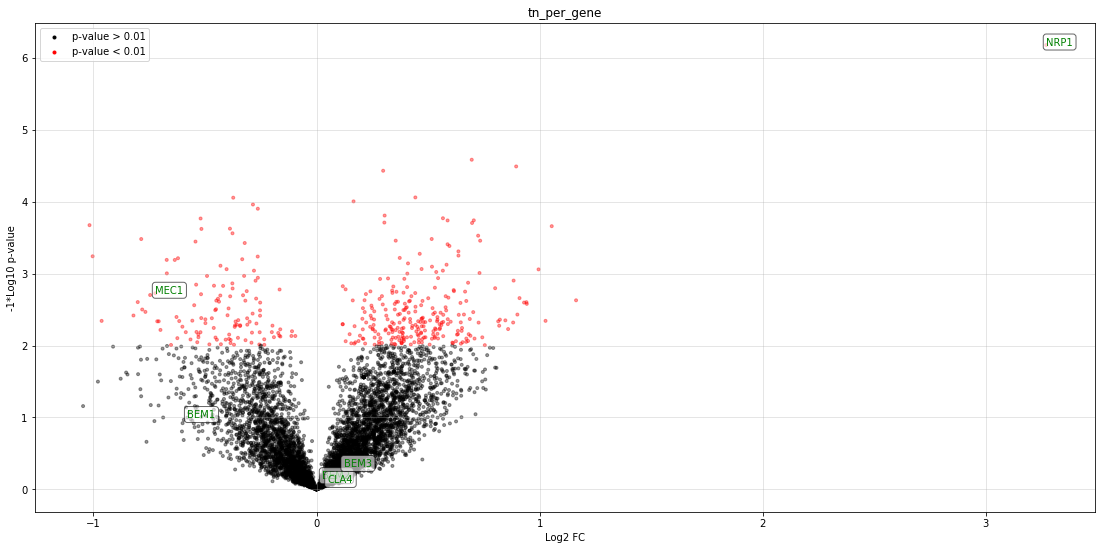

In [ ]:
# volcano plots


path_a = r"../data_files/pergene_replicates_wt_mutant_files/"
filelist_a = ["WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt", "WT_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene.txt"]
path_b = r"../data_files/pergene_replicates_wt_mutant_files/"
filelist_b = ["dnrp1-1_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt", "dnrp1-1_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene.txt", "dnrp1-2_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt", "dnrp1-2_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene.txt"]


variable = 'tn_per_gene' #'read_per_gene' 'tn_per_gene', 'Nreadsperinsrt'
significance_threshold = 0.01 #set threshold above which p-values are regarded significant
normalize=True

trackgene_list = []
# trackgene_list = ['nrp1']
trackgene_list = [ 'bem1', 'bem2', 'bem3', 'nrp1',  'cla4', 'mec1']
# trackgene_list = ['ymr320w','sut1','ymr242w-a','ypl135c-a','ppn1','ypl067c','yme1','mec1','nrp1','mss18','tma7','gef1']

figure_title = ""

volcano_df = volcano(path_a=path_a, filelist_a=filelist_a,
            path_b=path_b, filelist_b=filelist_b,
            variable=variable,
            significance_threshold=significance_threshold,
            normalize=normalize,
            trackgene_list=trackgene_list,
            figure_title=figure_title)